Project Specifications

1. A Fruits dataset is provided for this project, and it has images of (1) apples, (2) oranges, (3) bananas and (4) a mix of apples, oranges and bananas.
2. Your task is to implement a CNN to recognize the 4 classes accurately.
3. Use the images in the “train” folder to train your image classifier.
4. Then, test the accuracy of your image classifier using images from the “test” folder.
5. Document all your experiments and results. For example, what was done to increase the accuracy of your image classifier (e.g. image augmentation).
6. Use Matplotlib to produce any plots that help the reader understand your work better.

# Team 7A - SA4110 Machine Learning Application Development CA

Import necessary modules

In [1]:
import os
import random
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from PIL import Image
from numpy import expand_dims
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

## Data processing

### 1. Create an image path for training and testint

In [2]:
def disposal_files(path):
        files = os.listdir(path)
        for f in files:
            if f[-1] == "l":
                files.remove(f)  #skip .xml files
        return files

### 2. Process training and test dataset

(1) Convert all images' color modes to RGB  
(2) Resize all images to 64 * 64 pixel  
(3) Concatenate all images into an array  
(4) Reshape array

In [3]:
def disposal_x(path):
    
    files = disposal_files(path)
    x = None
    for i in range(0, len(files)):
        file_loc = path + files[i]
        img_raw = Image.open(file_loc)
        img_raw = img_raw.convert("RGB")
        img_tiny = img_raw.resize((resize,resize))

        if x is None:
            x = img_tiny
        else:
            x = np.concatenate((x, img_tiny))

    x = x.reshape(-1, resize, resize, 3)

    return x

### 3. Process classification

(1) Get classificationn from file name  
(2) Create lables  
(3) One-hot encode

In [4]:
def disposal_y(path):
    
    files = disposal_files(path)
    y = []
    for i in range(0, len(files)):
        if files[i].startswith("a"):
            y.append(files[i][0:5])
        elif files[i].startswith("b"):
            y.append(files[i][0:6])
        elif files[i].startswith("m"):
            y.append(files[i][0:5])
        elif files[i].startswith("o"):
            y.append(files[i][0:6])

    le = LabelEncoder()
    le.fit(y)

    y = le.transform(y)

    y = tf.keras.utils.to_categorical(y, len(le.classes_))

    return y

### 4. Assign dataset and classification values

In [5]:
def assign_value():
    global resize
    resize = 64
    train_path = "train/"
    test_path = "test/"
    
    global x_train, y_train_1hot, x_test, y_test_1hot
    x_train = disposal_x(train_path)
    y_train_1hot = disposal_y(train_path)

    x_test = disposal_x(test_path)
    y_test_1hot = disposal_y(test_path)

assign_value()

D:\anaconda3\envs\pythonEx\lib\site-packages\PIL\Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


### 5. Verify dataset and classification is processed correctly

In [6]:
def display_dataset():
    print(x_train.shape)
    print(y_train_1hot.shape)
    print(x_test.shape)
    print(y_test_1hot.shape)

    print(x_train[0])
    print(y_train_1hot[0])
    print(x_test[0])
    print(y_train_1hot)

display_dataset()

(254, 64, 64, 3)
(254, 4)
(60, 64, 64, 3)
(60, 4)
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]
[1. 0. 0. 0.]
[[[198 222 224]
  [102 130 104]
  [ 56  84  36]
  ...
  [100 121  68]
  [ 60  82  34]
  [136 151  86]]

 [[192 212 216]
  [ 97 123  97]
  [ 59  88  41]
  ...
  [133 149  96]
  [100 113  62]
  [ 64  85  33]]

 [[207 228 231]
  [ 94 120  95]
  [ 62  92  37]
  ...
  [208 208 175]
  [184 190 142]
  [ 54  71  

### 6. Show the processed images randomly, verify images are resized correctly

[185, 110, 56, 221, 126, 131, 91, 183, 167]


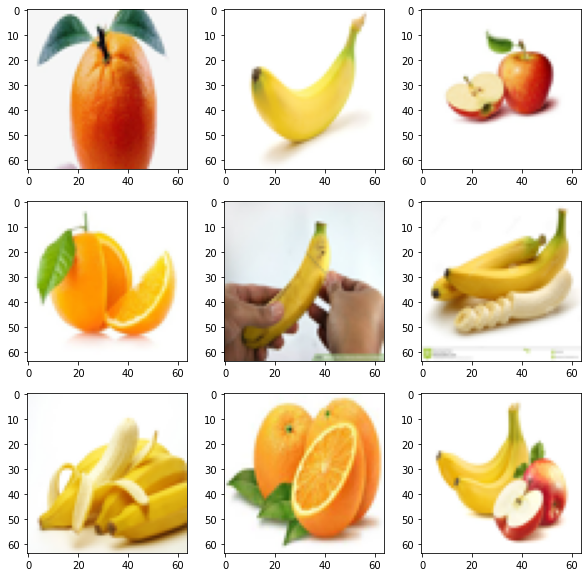

In [7]:
def random_show_resized_img():
    plt.figure(figsize=(10, 10))
    list_random = random.sample(range(254), 9)
    print(list_random)

    j = 0
    for i in list_random:
        ax = plt.subplot(3, 3, j+1)
        plt.imshow(Image.fromarray(x_train[i]))
        j += 1
        
random_show_resized_img()

## Constuct CNN

### 7.Define model layers and view model layer

In [8]:
def model_layers():
    model = tf.keras.Sequential()

    model.add(tf.keras.layers.Conv2D(filters=64,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(resize, resize, 3)))

    model.add(tf.keras.layers.Conv2D(filters=32,
        kernel_size=(3, 3),
        activation='relu'))

    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), padding='same'))
    model.add(tf.keras.layers.Dropout(rate=0.4))

    model.add(tf.keras.layers.Flatten())
    
    model.add(tf.keras.layers.Dense(units=64, activation='tanh'))
    model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.summary()
    
    return model

### 8. Add data augmentation and visualize augmented images

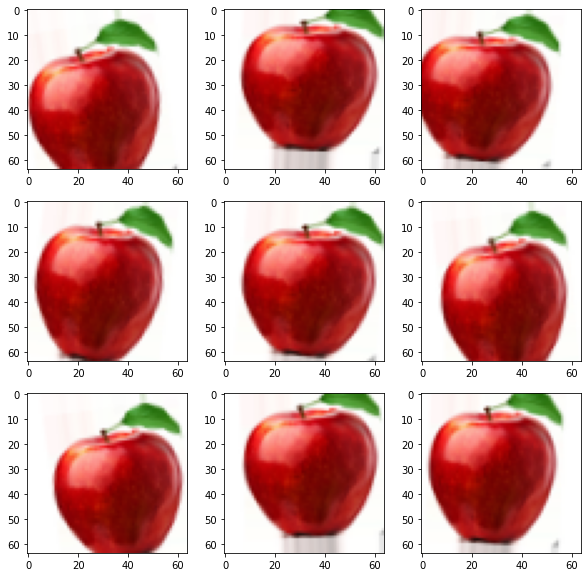

In [9]:
def data_augment():
    global datagen

    datagen = ImageDataGenerator(
        zoom_range=0.05,
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
    )

    img_aug = Image.fromarray(x_train[0])
    samples = expand_dims(img_aug,0)
    plt.figure(figsize=(10, 10))
    it=datagen.flow(samples, batch_size=1)

    for i in range(9):
        plt.subplot(330+1+i)
        batch=it.next()
        image=batch[0].astype('uint8')
        plt.imshow(image)

data_augment()

### 9. Train model and test model

In [10]:
def train_model():

    model = model_layers()
    
    datagen.fit(x_train)
    
    global epochs, history
    epochs=25
    history = model.fit_generator(datagen.flow(x=x_train/255, y=y_train_1hot, batch_size=32),   
                    epochs=epochs)
    
    loss, accuracy = model.evaluate(x=x_test/255, y=y_test_1hot)  
    
    print("The test dataset result is: \n")
    print('loss =', loss)
    print('accuracy =', accuracy)
    
    global y_pred
    y_pred = model.predict(x_test/255)  
    
    return model

train_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 64)                1843264   
                                                        

C:\Users\lxq\AppData\Local\Temp/ipykernel_42600/1460868318.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(x=x_train/255, y=y_train_1hot, batch_size=32),


8/8 [==============================] - 4s 350ms/step - loss: 2.4107 - accuracy: 0.2677
Epoch 2/25
8/8 [==============================] - 3s 345ms/step - loss: 1.0825 - accuracy: 0.5866
Epoch 3/25
8/8 [==============================] - 3s 348ms/step - loss: 0.7460 - accuracy: 0.6969
Epoch 4/25
8/8 [==============================] - 3s 361ms/step - loss: 0.5570 - accuracy: 0.7756
Epoch 5/25
8/8 [==============================] - 3s 370ms/step - loss: 0.4491 - accuracy: 0.8504
Epoch 6/25
8/8 [==============================] - 3s 370ms/step - loss: 0.3624 - accuracy: 0.8819
Epoch 7/25
8/8 [==============================] - 3s 396ms/step - loss: 0.4023 - accuracy: 0.8661
Epoch 8/25
8/8 [==============================] - 3s 379ms/step - loss: 0.3149 - accuracy: 0.9173
Epoch 9/25
8/8 [==============================] - 3s 363ms/step - loss: 0.2695 - accuracy: 0.8976
Epoch 10/25
8/8 [==============================] - 3s 357ms/step - loss: 0.2100 - accuracy: 0.9291
Epoch 11/25
8/8 [=============

### 10. Show confucsion matrix

Mixed images is difficult to be recognized.

In [11]:
def show_conf_matrix():
    
    y_pred_df = pd.DataFrame(y_pred)

    y_pred_int = np.argmax(y_pred, axis=1)

    y_actual_int = np.argmax(y_test_1hot, axis=1)

    conf = confusion_matrix(y_actual_int, y_pred_int)
    print("The confusion matrix is: \n", conf)

show_conf_matrix()

The confusion matrix is: 
 [[19  0  0  0]
 [ 1 16  0  1]
 [ 1  1  2  1]
 [ 0  0  0 18]]


### 11. Visualize the relation between epochs range with loss and accuracy

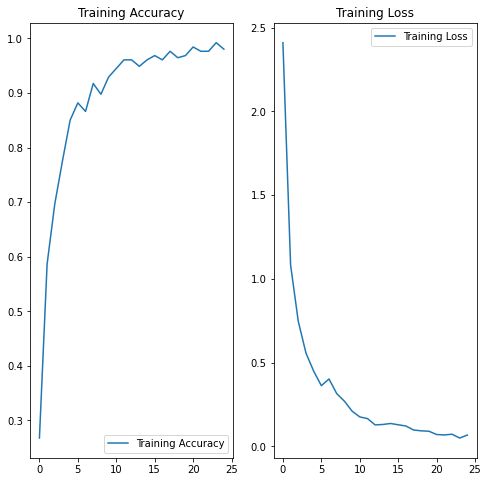

In [12]:
def visualize_result(history, epochs):
    
    acc = history.history['accuracy']

    loss = history.history['loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.legend(loc='upper right')
    plt.title('Training Loss')
    plt.show()

visualize_result(history, epochs)

# Experiments

## 1 Experiments on model training

### Initial setup

model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(filters=64,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(resize, resize, 4)))

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(rate=0.4))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dense(units=4, activation='softmax'))

Measurements:

- **Accuracy over 3 tries:** 88.52%  93.43%  91.80%
- **Speed (time/steps):**  ~120 ms/step

### 1.1 Convolutional Layer Experiments

### 1.1.1 Experiment 1: 1 Convolutional layer

model.add(tf.keras.layers.Conv2D(filters=64,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(resize, resize, 4)))

#### Measurements
- **Accuracy over 3 tries:** 80.32%  75.40%  88.52%
- **Speed (time/steps):**  ~55 ms/step

#### Observations
- **Negative change:** accuracy change
- **Positve change:** speed & less computer resources used

### 1.1.2 Experiment 2: 2 Convolutional layer (Filter for first layer changed to 32)

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(resize, resize, 4)))

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu'))
    
#### Measurements
- **Accuracy over 3 tries:** 88.52%  86.88%  86.88%
- **Speed (time/steps):**  ~71 ms/step

#### Observations
- **Negative change:** accuracy change
- **Positve change:** speed & less computer resources used

### 1.1.3 Experiment 3: 2 Convolutional layer (kernel for second layer to 5,5)

model.add(tf.keras.layers.Conv2D(filters=64,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(resize, resize, 4)))

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(5, 5),
    activation='relu'))
    
#### Measurements
- **Accuracy over 3 tries:** 91.80%  93.44%  83.60%
- **Speed (time/steps):**  ~280 ms/step

#### Observations
- **Negative change:** speed two times slower and not stable
- **Positve change:** -

### 1.1.4 Experiment 4: 2 Convolutional layer (kernel for second layer to 5,5 and filter size 64)

model.add(tf.keras.layers.Conv2D(filters=64,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(resize, resize, 4)))

model.add(tf.keras.layers.Conv2D(filters=64,
    kernel_size=(5, 5),
    activation='relu'))
    
#### Measurements
- **Accuracy over 3 tries:** 90.16%  86.88%  88.52%
- **Speed (time/steps):**  ~336 ms/step

#### Observations
- **Negative change:** Speed three times slower but doesn't go above the initial setup
- **Positve change:** -

### 1.1.5 Experiment 5: 3 Convolutional layer (kernel for second layer to 5,5 and filter size 64)

model.add(tf.keras.layers.Conv2D(filters=64,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(resize, resize, 4)))

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu'))

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu'))
    
#### Measurements
- **Accuracy over 3 tries:** 93.44%  88.52%  83.60%
- **Speed (time/steps):**  ~160 ms/step

#### Observations
- **Negative change:** slightly slower and not much change in terms of accuracy
- **Positve change:** -

## ==> Conclusion for Convolutional Layer Experiments

Since adding another convolutional layer didn't produce better results, it can be inferred that adding more layers does not increase accuracy. And it affects the efficiency of the program as well.

The initial setup still yields the best balance between accuracy and speed. Thus, we did not change from our initial setup.

## 1.2 Maxpooling Layer Experiments

### 1.2.1 Experiment 1: No Maxpooling layer

#### Measurements
- **Accuracy over 3 tries:** 86.88%  85.24%  86.88%
- **Speed (time/steps):**  ~140 ms/step

#### Observations
- **Negative change:** slightly slower and lower accuracy
- **Positve change:** -

### 1.2.2 Experiment 1: Experiment 2: pool size (3,3)

model.add(tf.keras.layers.MaxPooling2D(pool_size=(3, 3)))

#### Measurements
- **Accuracy over 3 tries:** 91.80%  93.44%  90.16%
- **Speed (time/steps):**  ~115 ms/step

#### Observations
- **Negative change:** -
- **Positve change:** slight faster and much more stable accuracy over 90%

### 1.2.3 Experiment 3: Stride (1,1)

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

#### Measurements
- **Accuracy over 3 tries:** 86.88%  85.24%  81.96%
- **Speed (time/steps):**  ~155 ms/step

#### Observations
- **Negative change:** slightly slower and significantly lower accuracy
- **Positve change:** -

### 1.2.4 Experiment 4: Max Pooling after every convolutional layer

model.add(tf.keras.layers.Conv2D(filters=64,
    kernel_size=(3, 3),
    activation='relu',
    input_shape=(resize, resize, 4)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

#### Measurements
- **Accuracy over 3 tries:** 95.08%  91.80%  88.52%
- **Speed (time/steps):**  ~63 ms/step

#### Observations
- **Negative change:** very unstable can hit as low as 81%
- **Positve change:** two times faster and we hit the 95% mark

### 1.2.5 Experiment 5: Max Pooling after every convolutional layer but with different settings

model.add(tf.keras.layers.Conv2D(filters=64,
        kernel_size=(3, 3),
        activation='relu',
        input_shape=(resize, resize, 4)))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(1,1)))

model.add(tf.keras.layers.Conv2D(filters=32,
    kernel_size=(3, 3),
    activation='relu'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

#### Measurements
- **Accuracy over 3 tries:** 81.96%  86.88%  88.52%
- **Speed (time/steps):**  ~150 ms/step

#### Observations
- **Negative change:** slightly slower
- **Positve change:** -

### 1.1.6 Experiment 6: Padding - same

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), padding='same'))

#### Measurements
- **Accuracy over 3 tries:** 91.80%  90.16%  91.80%
- **Speed (time/steps):**  ~122 ms/step

#### Observations
- **Negative change:** -
- **Positve change:** not much loss in speed and more stable accuracy

### ==> Conclusion for Maxpooling Layer Experiments

We might consider increasing the pool size to (3,3) and possibly have two max pooling layers - each after a convolutional layer.

Adding padding seems to stabilise the scores to float around the 90% mark.

But after further testing, the results were much more varied and were very unstable. Thus, we decided to stick to our current setup

## 1.3 Dense Layer Experiments

### 1.3.1 Experiment 1: No dense layer

#### Measurements
- **Accuracy over 3 tries:** 78.69%  86.88%  83.60%
- **Speed (time/steps):**  ~115 ms/step

#### Observations
- **Negative change:** big drop in accuracy
- **Positve change:** -

### ==> Conclusion for Dense Layer Experiments

A dense layer is definitely needed. 

# ^^^^^^^^NOT FINISHED YET^^^^^^^^

## 1.4 Dropout Layer Experiments

### 1.4.1 Experiment 1: 

#### Measurements
- **Accuracy over 3 tries:** 
- **Speed (time/steps):**  

#### Observations
- **Negative change:** 
- **Positve change:** 

### ==> Conclusion for Dense Layer Experiments

XXX

# ^^^^^^^^NOT FINISHED YET^^^^^^^^

## 2 Experiments on Model Fitting Parameter

### Initial setup

model.fit_generator(datagen.flow(x=x_train/255, y=y_train_1hot, batch_size=32),   
                    epochs=20)

### 2.1 Batch Size Experiment

#### 2.1.1 Experiment 1: Increase batch size to 64
model.fit_generator(datagen.flow(x=x_train/255, y=y_train_1hot, batch_size=64),   
                    epochs=20)

#### Measurements
- **Accuracy over 3 tries:** 
- **Speed (time/steps):**  

#### Observations
- **Negative change:** almost no effect on accuracy and total processing time
- **Positve change:** -

### ==> Conclusion for Batch Size Experiment

Decreasing batch size takes shorter epoch to reach plateau accuracy, however the difference is not significant yet time taken for each epochs increases, leading to longer total processing time for the model.

# ^^^^^^^^NOT FINISHED YET^^^^^^^^

## 2.2 Epochs Experiment

### 2.2.1 Experiment 1: Increase epochs to X
model.fit_generator(datagen.flow(x=x_train/255, y=y_train_1hot, batch_size=64),   
                    epochs=50)

#### Measurements
- **Accuracy over 3 tries:** 
- **Speed (time/steps):**  

#### Observations
- **Negative change:** 
- **Positve change:** -

### 2.2.1 Experiment 1: Decrease epochs to X
model.fit_generator(datagen.flow(x=x_train/255, y=y_train_1hot, batch_size=64),   
                    epochs=10)

#### Measurements
- **Accuracy over 3 tries:** 
- **Speed (time/steps):**  

#### Observations
- **Negative change:** 
- **Positve change:** -

### ==> Conclusion for Batch Size Experiment

As number of epochs increases, accuracy increases to a plateau accuracy before going close to 100% (1.0 accuracy), however, this is due to overfitting of the model as the model is well-trained only to this training data set.

## 3 Experiments on Data Augmentation

## 3.1 Data Augmentation Experiments

### Initial setup

datagen = ImageDataGenerator()

- **Accuracy over 3 tries:** 85.00% 88.33% 83.33%  
while training accuracy reaches 100% due to overfitting

### 3.1.1 Experiment 1: Add Zoom Augmentation

datagen = ImageDataGenerator(zoom_range=0.1)

#### Measurements
- **Accuracy over 3 tries:** 88.33% 91.67% 88.33%

#### Observations
- **Negative change:** -
- **Positve change:** increase accuracy effectively

### 3.1.2 Experiment 2: Add Horizontal and Vertical Shift Augmentation

datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1)

#### Measurements
- **Accuracy over 3 tries:** 88.33% 91.67% 91.67%

#### Observations
- **Negative change:** -
- **Positve change:** increase accuracy effectively

### 3.1.3 Experiment 3: Add Horizontal and Vertical Flip Augmentation

datagen = ImageDataGenerator(horizontal_flip=True)

#### Measurements
- **Accuracy over 3 tries:** 88.33% 86.67% 85.00%

#### Observations
- **Negative change:** almost no effect on accuracy
- **Positve change:** -

### 3.1.4 Experiment 4: Add Rotation Augmentation

datagen = ImageDataGenerator(rotation_range=10)

#### Measurements
- **Accuracy over 3 tries:** 88.33% 86.67% 91.67%

#### Observations
- **Negative change:** -
- **Positve change:** increase accuracy effectively

### 3.1.5 Experiment 5: Add Brightness Augmentation

datagen = ImageDataGenerator(brightness_range=[0.8,1.2])

#### Measurements
- **Accuracy over 3 tries:** 56.67% 58.33% 61.67%

#### Observations
- **Negative change:** decrease testing accuracy significantly while training accuracy reach 100%, due to overfitting
- **Positve change:** -

### ==> Conclusion for Data Augmentation Experiment

Data augmentation is usually used when dataset is limited.Because we only have less than images for each classification, we consider to use data augmentation to increase accuracy.

Zoom, rotation, shift is useful to reduce overfitting effectively and build a robust model, which can increase accuracy. Using data augmentation almost makes no difference on model fitting speed. As for parameter of method, high parameter may reduce the accuracy of model. Additionally, when using data augmentation, with the increase of amount of dataset, low epochs may lead to underfitting, so we should rise epochs if we use data augmentation.

## 3 Experiments on Others

## 3.1 Add training Dataset Experiments


## 3.2 Image size Experiments

